# Import Packages
Below, you'll find what you need in order to run this notebook successfully. I used Pandas, Matplotlib and Numpy.

In [115]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read Data In
I pulled in baby name data from 2010 and 2019; the show premiered in April 2011, so I chose the year before as a comparison to demonstrate that some of the names might not have ever been
on anyone's radar, save people that had read the books. I chose 2019 because the series ended in May of that year, so by then, the names would have become a part of pop culture.

In [116]:
#2010 data
df_2010 = pd.read_csv('assets/yob_2010.csv')
#2019 data
df_2019 = pd.read_csv('assets/yob2019.csv')


# Combine the Two Dataframes
I combined the 2010 and 2019 data into one frame so I could analyze it more easily.

In [117]:
#I combined the two dataframes into one and merged the "Name" column because there were, for example, more than one instance of the name "Arya" in that column in both files.
df_combined_years = pd.merge(df_2010, df_2019, on=['Name', 'Gender'], how='outer')
df_combined_years

,Name,Gender,2010 Name Count,2019 Name Count
0,Isabella,F,22925.0,13360.0
1,Sophia,F,20648.0,13769.0
2,Emma,F,17354.0,17176.0
3,Olivia,F,17030.0,NaN
4,Ava,F,15436.0,14515.0
...,...,...,...,...
42858,Zyhaire,M,NaN,5.0
42859,Zyheem,M,NaN,5.0
42860,Zykel,M,NaN,5.0
42861,Zyking,M,NaN,5.0


# Clean Up Data
I changed odd values to zeroes to make the data even easier to analyze.

In [118]:
#I changed NaN values to zeroes.
df_combined_years['2010 Name Count'].fillna(0, inplace = True)
df_combined_years['2019 Name Count'].fillna(0, inplace = True)
df_combined_years

,Name,Gender,2010 Name Count,2019 Name Count
0,Isabella,F,22925.0,13360.0
1,Sophia,F,20648.0,13769.0
2,Emma,F,17354.0,17176.0
3,Olivia,F,17030.0,0.0
4,Ava,F,15436.0,14515.0
...,...,...,...,...
42858,Zyhaire,M,0.0,5.0
42859,Zyheem,M,0.0,5.0
42860,Zykel,M,0.0,5.0
42861,Zyking,M,0.0,5.0


In [119]:
#I tested to see if I could pull names and get counts side by side.
df_combined_years.loc[(df_combined_years['Name']=='Cersei') | (df_combined_years['Name']=='Sansa')]

,Name,Gender,2010 Name Count,2019 Name Count
34254,Sansa,F,0.0,28.0
36823,Cersei,F,0.0,6.0


# Analyze the Data
I used the .loc method to retrieve rows from the dataframe that contained specific _Game of Thrones_ character names, then checked to see if there was growth in name occurence between 2010 and 2019. For many of the main character names, I found that to be the case.

In [120]:
#See how many times specific character names show up in the dataframe to compare occurences in year 2010 vs. 2019, and only show male and female results where it makes sense.
df_characters = df_combined_years.loc[
                        (df_combined_years['Name']=='Cersei') |  
                        (df_combined_years['Name']=='Arya') & (df_combined_years['Gender']=='F') | 
                        (df_combined_years['Name']=='Jon') | 
                        (df_combined_years['Name']=='Khaleesi') |
                        (df_combined_years['Name']=='Brienne') |
                        (df_combined_years['Name']=='Daenerys') & (df_combined_years['Gender']=='F') |
                        (df_combined_years['Name']=='Jorah') & (df_combined_years['Gender']=='M') |
                        (df_combined_years['Name']=='Margaery') |
                        (df_combined_years['Name']=='Samwell') |
                        (df_combined_years['Name']=='Sansa') |
                        (df_combined_years['Name']=='Theon') |
                        (df_combined_years['Name']=='Tyrion')
                         ]
df_characters

,Name,Gender,2010 Name Count,2019 Name Count
941,Arya,F,273.0,3047.0
6419,Brienne,F,20.0,33.0
20398,Jon,M,439.0,315.0
27369,Tyrion,M,11.0,57.0
34093,Khaleesi,F,0.0,522.0
34102,Daenerys,F,0.0,142.0
34254,Sansa,F,0.0,28.0
36823,Cersei,F,0.0,6.0
38414,Margaery,F,0.0,5.0
39044,Jorah,M,0.0,35.0


In [127]:
#Sorted the characters in order of the highest values that appeared in the 2019 results to see the most common names, highest to lowest.
df_sorted = df_characters.sort_values(by='2019 Name Count', ascending=False).reset_index(drop=True)
df_sorted

,Name,Gender,2010 Name Count,2019 Name Count
0,Arya,F,273.0,3047.0
1,Khaleesi,F,0.0,522.0
2,Jon,M,439.0,315.0
3,Daenerys,F,0.0,142.0
4,Tyrion,M,11.0,57.0
5,Jorah,M,0.0,35.0
6,Brienne,F,20.0,33.0
7,Sansa,F,0.0,28.0
8,Theon,M,0.0,27.0
9,Samwell,M,0.0,10.0


# Plot the Data
This is the fun part! 

<AxesSubplot:title={'center':'Growth in Game of Thrones Character Name Popularity'}, xlabel='Character Name', ylabel='Number of Occurrences'>

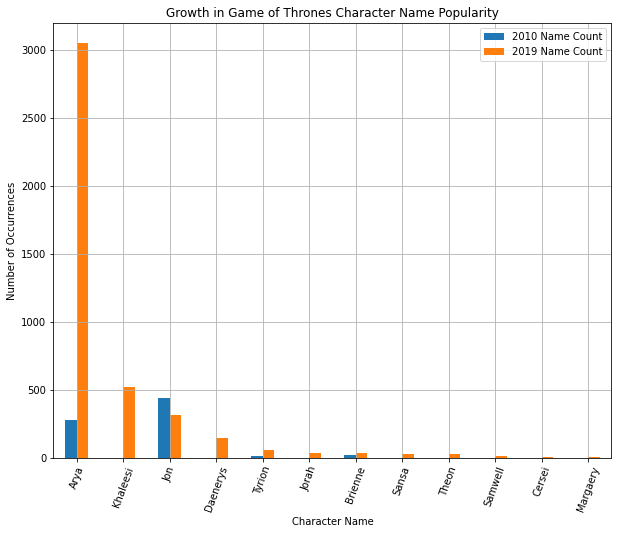

In [128]:

df_sorted.plot.bar(x=('Name'), y=['2010 Name Count', '2019 Name Count'], rot=70, title='Growth in Game of Thrones Character Name Popularity', figsize=(10, 8), xlabel='Character Name', ylabel='Number of Occurrences', grid=True)


# Conclusion
Copy goes here